# Fortsetzung der messwerte, analyse der datenverteilung

In [32]:
import lmfit
from matplotlib import pyplot as plt
from mat4py import loadmat
import numpy as np
import os


In [52]:
data = loadmat('sequence_data1-1_1.mat')
shape0 = np.array(data["sequences"][2][0].get("Xarr")).shape
np.array(data["sequences"][2][0].get("Tarr")*shape0[0])

array([72.44, 72.64, 72.84, 73.04, 73.24, 73.44, 72.44, 72.64, 72.84,
       73.04, 73.24, 73.44, 72.44, 72.64, 72.84, 73.04, 73.24, 73.44])

In [ ]:
x_lst = []
t_lst = []
data = loadmat('sequence_data1-1_1.mat')

shape0 = np.array(data["sequences"][2][0].get("Xarr")).shape
for lst in data["sequences"]:
    x_lst.extend(np.array(lst[0].get("Xarr")).ravel())
    t = np.array(lst[0].get("Tarr")*shape0[0])
    t_lst.extend(t-np.min(t))
    

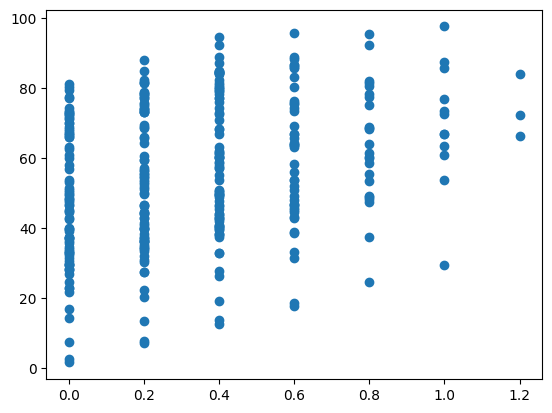

In [54]:
plt.plot(t_lst, x_lst, "o")

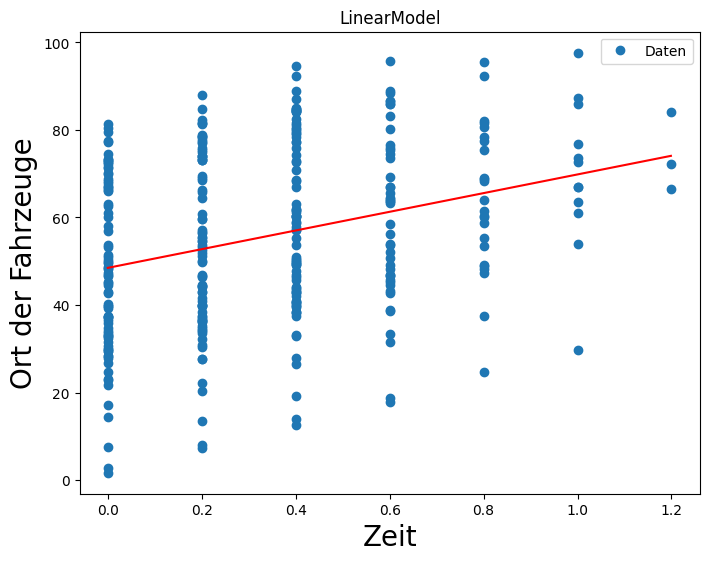

In [55]:
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, LinearModel

mod = LinearModel()# Model(plot_func)#GaussianModel(prefix = "a")+GaussianModel(prefix = "b")

pars = mod.make_params()
result = mod.fit(x_lst, pars, x=t_lst)
dynamic_resolution_array = np.arange(min(t_lst),max(t_lst), 0.001*abs(max(t_lst)-min(t_lst)))

plt.figure(figsize=(8, 6))
# plt.errorbar(y = x_lst, yerr = Daten.get_yerr(), x = t_lst, xerr = Daten.get_xerr(), \
#     fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
#     label = r'Werte')

plt.plot(t_lst, x_lst, "o", label="Daten")
plt.legend()
plt.ylabel("Ort der Fahrzeuge", fontsize=20)
plt.xlabel("Zeit", fontsize=20)
plt.title('LinearModel')

plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str((result.result.redchi,3)))

plt.show()

In [61]:
# einzelne messreihen unter sich
def d(x:np.ndarray): # Abstandsfunktion
    d = np.ones_like(x) * np.inf # anfangs distanz auf sehr groß setzen
    order_mask = np.argsort(x) # nach i-ter achse sortieren, hier x achse -> 0
    x_ordered = x[order_mask]
    for i, x_i in enumerate(x_ordered):
        for j, x_j in enumerate(x_ordered[i+1:]):
            d = np.linalg.norm(x_j - x_i) if np.linalg.norm(x_j - x_i) < d[i] else d[i]
    return d


x_lst = []
t_lst = []
data = loadmat('sequence_data1-1_1.mat')

shape0 = np.array(data["sequences"][2][0].get("Xarr")).shape
for lst in data["sequences"]:
    x = np.array(lst[0].get("Xarr")).ravel()
    x_lst.append(x)
    t = np.array(lst[0].get("Tarr")*shape0[0])
    t_lst.append(t-np.min(t))



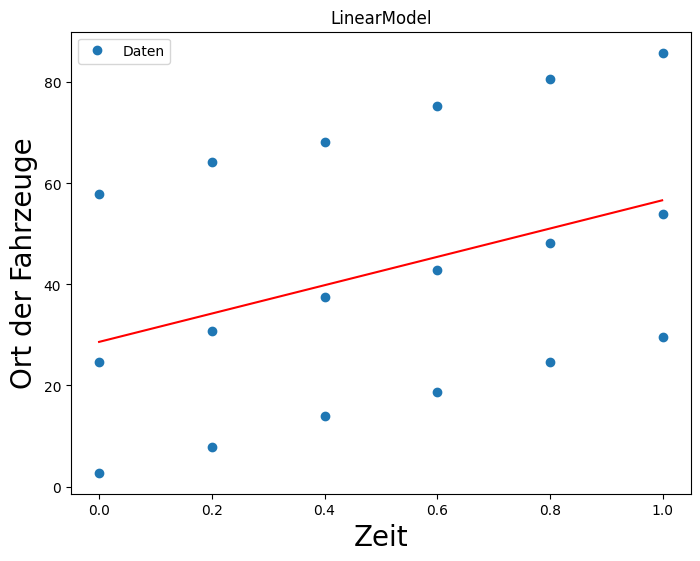

In [65]:
index = 2

from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, LinearModel

mod = LinearModel()# Model(plot_func)#GaussianModel(prefix = "a")+GaussianModel(prefix = "b")

pars = mod.make_params()
result = mod.fit(x_lst[index], pars, x=t_lst[index])
dynamic_resolution_array = np.arange(min(t_lst[index]),max(t_lst[index]), 0.001*abs(max(t_lst[index])-min(t_lst[index])))

plt.figure(figsize=(8, 6))
# plt.errorbar(y = x_lst[index], yerr = Daten.get_yerr(), x = t_lst[index], xerr = Daten.get_xerr(), \
#     fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
#     label = r'Werte')

plt.plot(t_lst[index], x_lst[index], "o", label="Daten")
plt.legend()
plt.ylabel("Ort der Fahrzeuge", fontsize=20)
plt.xlabel("Zeit", fontsize=20)
plt.title('LinearModel')

plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str((result.result.redchi,3)))

plt.show()

# sieht recht linear aus? 
## mehr daten

In [40]:
File_names = []
for file in os.listdir('TrafficDataset/'):
     # check the files which are end with specific extension
    if file.endswith(".mat"):
        # print path name of selected files
        File_names.append(str(os.path.join('TrafficDataset/', file)))

File_names

['TrafficDataset/sequence_data1-1_1.mat',
 'TrafficDataset/sequence_data1-1_2.mat',
 'TrafficDataset/sequence_data2-1_1.mat',
 'TrafficDataset/sequence_data2-1_2.mat',
 'TrafficDataset/sequence_data3-1_1.mat',
 'TrafficDataset/sequence_data3-1_2.mat',
 'TrafficDataset/sequence_data4-1_1.mat',
 'TrafficDataset/sequence_data4-1_2.mat',
 'TrafficDataset/sequence_data5-1_1.mat',
 'TrafficDataset/sequence_data5-1_2.mat']

In [44]:
x_lst = []
t_lst = []
File_names = []
for file in os.listdir('TrafficDataset/'):
     # check the files which are end with specific extension
    if file.endswith(".mat"):
        # print path name of selected files
        File_names.append(str(os.path.join('TrafficDataset/', file)))

for fileName in File_names:
	data = loadmat(fileName)
	for lst in data["sequences"]:
		x_lst.extend(np.array(lst[0].get("Xarr")).ravel())
		shape0 = np.array(lst[0].get("Xarr")).shape
		t = np.array(lst[0].get("Tarr")*shape0[0])
		t_lst.extend(t-np.min(t))
    

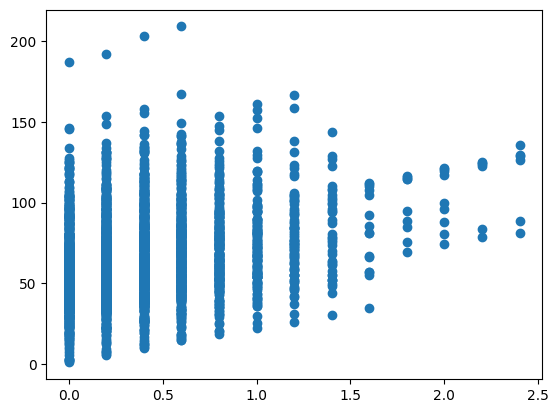

In [46]:
plt.plot(t_lst, x_lst, "o")

Fit

In [ ]:
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, LinearModel

mod = LinearModel()# Model(plot_func)#GaussianModel(prefix = "a")+GaussianModel(prefix = "b")

pars = mod.make_params()
pars

name,value,initial value,min,max,vary
slope,1.00000000,None,-inf,inf,True
intercept,0.00000000,None,-inf,inf,True


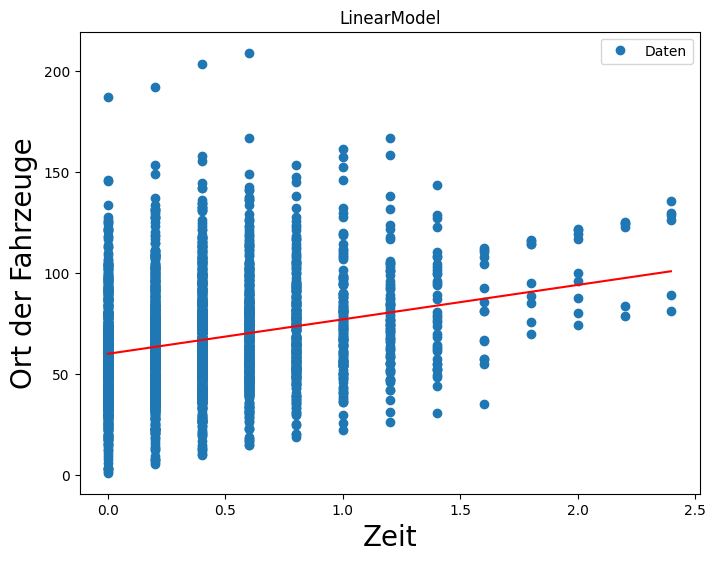

In [51]:
result = mod.fit(x_lst, pars, x=t_lst)
dynamic_resolution_array = np.arange(min(t_lst),max(t_lst), 0.001*abs(max(t_lst)-min(t_lst)))

plt.figure(figsize=(8, 6))
# plt.errorbar(y = x_lst, yerr = Daten.get_yerr(), x = t_lst, xerr = Daten.get_xerr(), \
#     fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
#     label = r'Werte')

plt.plot(t_lst, x_lst, "o", label="Daten")
plt.legend()
plt.ylabel("Ort der Fahrzeuge", fontsize=20)
plt.xlabel("Zeit", fontsize=20)
plt.title('LinearModel')

plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str((result.result.redchi,3)))

plt.show()

# Jedes Auto muss einzeln linear approximiert werden

In [1]:
from opt_lib import *
# Parameter definieren
dt = 0.001
L = 3
v_max = 20

test = data_class("TrafficDataset/sequence_data1-1_1.mat")
test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
mask_approx = np.zeros(test.get_len(), bool)

for i in range(len(mask_approx)):
	mask_approx[i] = np.any(test.get_ItError() >= 0.01)
	test.next_dataset() # Nächster Datensatz
	test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
mask_approx

Error: Index 28 is out of range of the dataset with length 28 !!!


array([False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False])

[0.01387405 0.01094408 0.00647627]


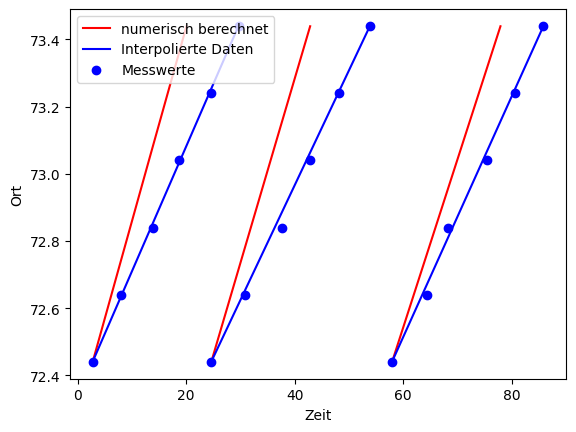

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	1.3874054633572739
1	|	1.0944082361637832
2	|	0.6476270495904378


In [3]:
from opt_lib import *
# Parameter definieren
dt = 0.001
L = 3
v_max = 20

test = data_class("TrafficDataset/sequence_data1-1_1.mat")
test.next_dataset(2) # Nächster Datensatz
test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
print(test.test_interpolation(dt)) # durchschnittlicher Fehler der Interpolation abfragen
test.switch_iteration() # Die interpolierten werte als zu berücksichtigende Daten setzen

x_num = np.zeros_like(test.get_x())# Array definieren, in dem die numerisch bestimmten ort abgespeichert werden
J_array = np.zeros(test.get_t().shape[0] - 1) # Array definieren, in dem der Loss abgespeichert wird

for i in range(len(J_array)+1):
	x_soll, t_soll = test.getCurrentCoords() # Aktuelle ort, zeit punkte der autos ausgeben
	if i != 0: # Falls wir schon einen Schritt gegangen sind
		J_array[i-1] = J(x, dt, x_soll) # Loss berechnen
	else: # Falls der erste durchlauf
		x, t = x_soll, t_soll
	dist = d(x) # Distanzen zwischen den autos berechnen
	x, _ = single_step(x, v_max, L, dt, "lin") # x aktualisieren
	x_num[:,i] = x
	t += dt

# Visualisieren
from matplotlib import pyplot as plt

plt.plot(x_num[0,:], test.get_t(), color = "red")
plt.plot(x_num[1,:], test.get_t(), color = "red")
plt.plot(x_num[2,:], test.get_t(), color = "red", label = "numerisch berechnet")
plt.plot(test.get_x()[0,:], test.get_t(), color = "blue")
plt.plot(test.get_x()[1,:], test.get_t(), color = "blue")
plt.plot(test.get_x()[2,:], test.get_t(), color = "blue", label = "Interpolierte Daten")
plt.plot(test.get_xIt()[0,:], test.get_tIt(), "o", color = "blue")
plt.plot(test.get_xIt()[1,:], test.get_tIt(), "o", color = "blue")
plt.plot(test.get_xIt()[2,:], test.get_tIt(), "o", color = "blue", label = "Messwerte")
plt.legend()
plt.xlabel("Zeit")
plt.ylabel("Ort")
plt.show()
print(f"Der Fehler der Interpolation ist je")
print("Auto\t|\tRealtiver Fehler")
print("-------------------------------")
for i, err in enumerate(test.get_ItError()):
    print(f"{i}\t|\t{err*100}")

In [8]:
from opt_lib import *
# Parameter definieren
dt = 0.001

filenames = [
	"TrafficDataset/sequence_data1-1_1.mat",
	"TrafficDataset/sequence_data1-1_2.mat",
	"TrafficDataset/sequence_data2-1_1.mat",
	"TrafficDataset/sequence_data2-1_2.mat",
	"TrafficDataset/sequence_data3-1_1.mat",
	"TrafficDataset/sequence_data3-1_2.mat",
	"TrafficDataset/sequence_data4-1_1.mat",
	"TrafficDataset/sequence_data4-1_2.mat",
	"TrafficDataset/sequence_data5-1_1.mat",
	"TrafficDataset/sequence_data5-1_2.mat"
	]
masks = [] 
for file in filenames:
	test = data_class(file)
	test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
	mask_approx = np.zeros(test.get_len(), bool)

	for i in range(len(mask_approx)):
		mask_approx[i] = np.any(test.get_ItError() >= 0.05)
		test.next_dataset() # Nächster Datensatz
		test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
	masks.append(mask_approx)


masks

Error: Index 28 is out of range of the dataset with length 28 !!!
Error: Index 18 is out of range of the dataset with length 18 !!!
Error: Index 55 is out of range of the dataset with length 55 !!!
Error: Index 30 is out of range of the dataset with length 30 !!!
Error: Index 14 is out of range of the dataset with length 14 !!!
Error: Index 3 is out of range of the dataset with length 3 !!!
Error: Index 8 is out of range of the dataset with length 8 !!!
Error: Index 21 is out of range of the dataset with length 21 !!!
Error: Index 9 is out of range of the dataset with length 9 !!!
Error: Index 22 is out of range of the dataset with length 22 !!!


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False

In [12]:
index = []
for i, mask in enumerate(masks):
    if np.sum(mask) > 0:
        index.append(i)
index

[2, 9]

In datensatz 2 und 9 sind größere Ungenauigkeiten durch die lineare approximation entstanden

## Datensatz index 2

In [ ]:
test = data_class(filenames[2])
test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
mask_approx = np.zeros(test.get_len(), bool)

for i in range(len(mask_approx)):
	mask_approx[i] = np.any(test.get_ItError() >= 0.05)
	test.next_dataset() # Nächster Datensatz
	test.LinInterplation(dt)
np.where(mask_approx == True)[0][0]

Error: Index 55 is out of range of the dataset with length 55 !!!


np.int64(38)

[0.05525467 0.01236255 0.00755602]


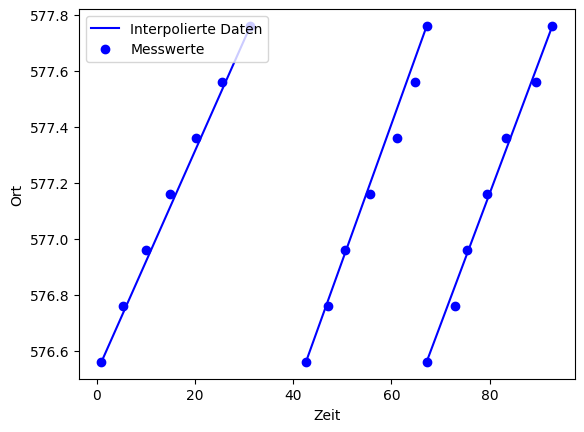

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	5.525467294722551
1	|	1.2362545298644512
2	|	0.7556015702058222


In [19]:
from opt_lib import *
# Parameter definieren
dt = 0.001
L = 3
v_max = 20

test = data_class(filenames[2])
test.next_dataset(np.where(mask_approx == True)[0][0]) # Nächster Datensatz
test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
print(test.test_interpolation(dt)) # durchschnittlicher Fehler der Interpolation abfragen
test.switch_iteration()
# Visualisieren
from matplotlib import pyplot as plt
plt.plot(test.get_x()[0,:], test.get_t(), color = "blue")
plt.plot(test.get_x()[1,:], test.get_t(), color = "blue")
plt.plot(test.get_x()[2,:], test.get_t(), color = "blue", label = "Interpolierte Daten")
plt.plot(test.get_xIt()[0,:], test.get_tIt(), "o", color = "blue")
plt.plot(test.get_xIt()[1,:], test.get_tIt(), "o", color = "blue")
plt.plot(test.get_xIt()[2,:], test.get_tIt(), "o", color = "blue", label = "Messwerte")
plt.legend()
plt.xlabel("Zeit")
plt.ylabel("Ort")
plt.show()
print(f"Der Fehler der Interpolation ist je")
print("Auto\t|\tRealtiver Fehler")
print("-------------------------------")
for i, err in enumerate(test.get_ItError()):
    print(f"{i}\t|\t{err*100}")

## Datensatz index 9

In [20]:
test = data_class(filenames[9])
test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
mask_approx = np.zeros(test.get_len(), bool)

for i in range(len(mask_approx)):
	mask_approx[i] = np.any(test.get_ItError() >= 0.05)
	test.next_dataset() # Nächster Datensatz
	test.LinInterplation(dt)
np.where(mask_approx == True)[0][0]

Error: Index 22 is out of range of the dataset with length 22 !!!


np.int64(1)

[0.0408349  0.05170113 0.00849616]


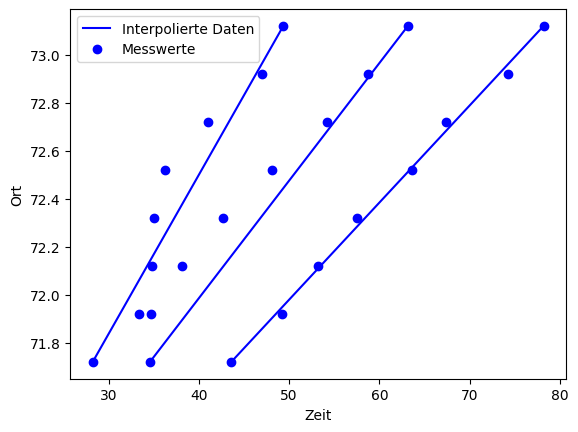

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	4.083490219901089
1	|	5.170113327815409
2	|	0.8496163010883814


In [21]:
from opt_lib import *
# Parameter definieren
dt = 0.001
L = 3
v_max = 20

test = data_class(filenames[9])
test.next_dataset(np.where(mask_approx == True)[0][0]) # Nächster Datensatz
test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
print(test.test_interpolation(dt)) # durchschnittlicher Fehler der Interpolation abfragen
test.switch_iteration()
# Visualisieren
from matplotlib import pyplot as plt
plt.plot(test.get_x()[0,:], test.get_t(), color = "blue")
plt.plot(test.get_x()[1,:], test.get_t(), color = "blue")
plt.plot(test.get_x()[2,:], test.get_t(), color = "blue", label = "Interpolierte Daten")
plt.plot(test.get_xIt()[0,:], test.get_tIt(), "o", color = "blue")
plt.plot(test.get_xIt()[1,:], test.get_tIt(), "o", color = "blue")
plt.plot(test.get_xIt()[2,:], test.get_tIt(), "o", color = "blue", label = "Messwerte")
plt.legend()
plt.xlabel("Zeit")
plt.ylabel("Ort")
plt.show()
print(f"Der Fehler der Interpolation ist je")
print("Auto\t|\tRealtiver Fehler")
print("-------------------------------")
for i, err in enumerate(test.get_ItError()):
    print(f"{i}\t|\t{err*100}")

### Ein nicht Linearer Verlauf !!!

# Die Datensätze müssen auf Linearität geprüft werden !!!!

In [32]:
# schneller test, ob linear:
auto_0 = np.corrcoef(test.get_tIt(), test.get_xIt()[0,:])[0, 1]
auto_1 = np.corrcoef(test.get_tIt(), test.get_xIt()[1,:])[0, 1]
auto_2 = np.corrcoef(test.get_tIt(), test.get_xIt()[2,:])[0, 1]
auto_0, auto_1, auto_2

(np.float64(0.9621364880962064),
 np.float64(0.9866628714011201),
 np.float64(0.9983122396074252))

In [1]:
from opt_lib import *
# Parameter definieren
tol = 0.03

filenames = [
	"TrafficDataset/sequence_data1-1_1.mat",
	"TrafficDataset/sequence_data1-1_2.mat",
	"TrafficDataset/sequence_data2-1_1.mat",
	"TrafficDataset/sequence_data2-1_2.mat",
	"TrafficDataset/sequence_data3-1_1.mat",
	"TrafficDataset/sequence_data3-1_2.mat",
	"TrafficDataset/sequence_data4-1_1.mat",
	"TrafficDataset/sequence_data4-1_2.mat",
	"TrafficDataset/sequence_data5-1_1.mat",
	"TrafficDataset/sequence_data5-1_2.mat"
	]
masks = [] 
for file in filenames:
	test = data_class(file)
	test.test_correl(tol)
	mask_approx = np.zeros(test.get_len(), bool)

	for i in range(len(mask_approx)):
		mask_approx[i] = np.any(test.get_ItError() >= tol)
		test.next_dataset() # Nächster Datensatz
		test.test_correl()
		# test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren
	masks.append(mask_approx)
masks

Error: Index 28 is out of range of the dataset with length 28 !!!
Error: Index 18 is out of range of the dataset with length 18 !!!
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
Error: Index 55 is out of range of the dataset with length 55 !!!
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
Error: Index 30 is out of range of the dataset with length 30 !!!
Error: Index 14 is out of range of the dataset with length 14 !!!
Error: Index 3 is out of range of the dataset with length 3 !!!
Error: Index 8 i

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True, False, False, False,  True, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False

In [2]:
index = []
for i, mask in enumerate(masks):
    if np.sum(mask) > 0:
        index.append(i)
index

[2, 3, 7, 9]

ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
Error: Index 55 is out of range of the dataset with length 55 !!!
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


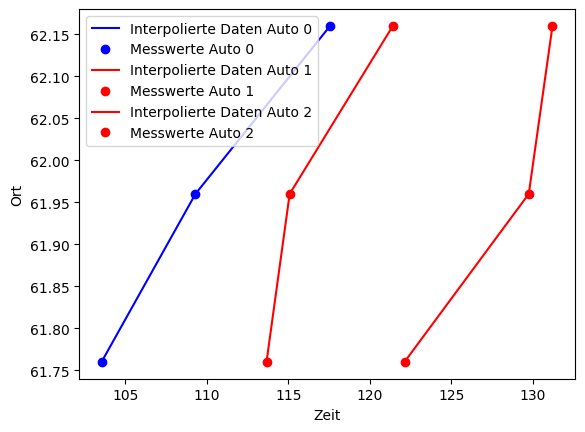

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	0.5262254938481425
1	|	6.083493247334704
2	|	6.90386369950301
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


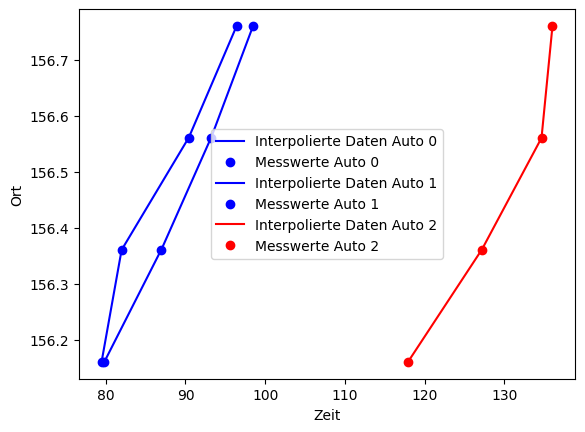

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	1.804763005924026
1	|	0.2259151817754712
2	|	4.036309167560869
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


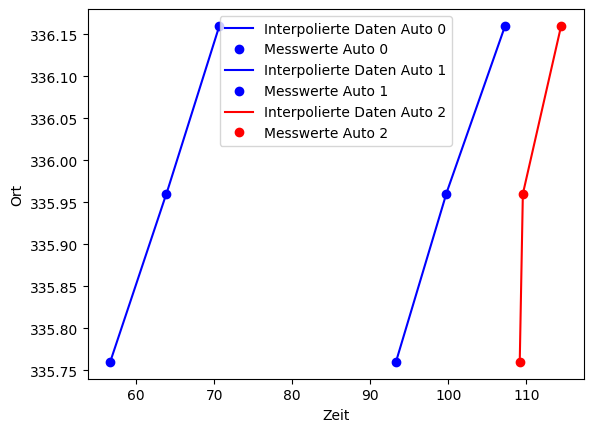

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	0.015030985474073777
1	|	0.10461559428626144
2	|	10.222489705783566
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


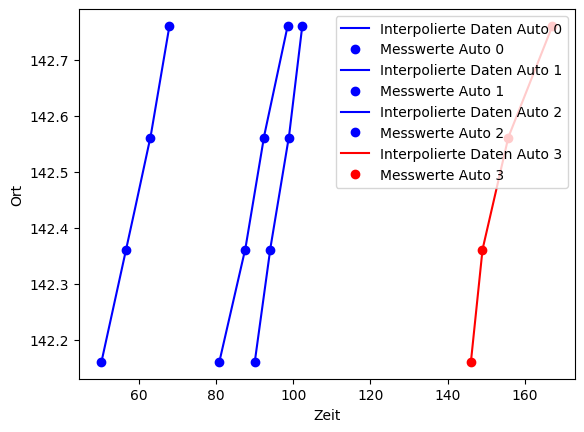

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	0.17105400812330585
1	|	0.17611149186856911
2	|	0.17715673418770006
3	|	3.492581855254273
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


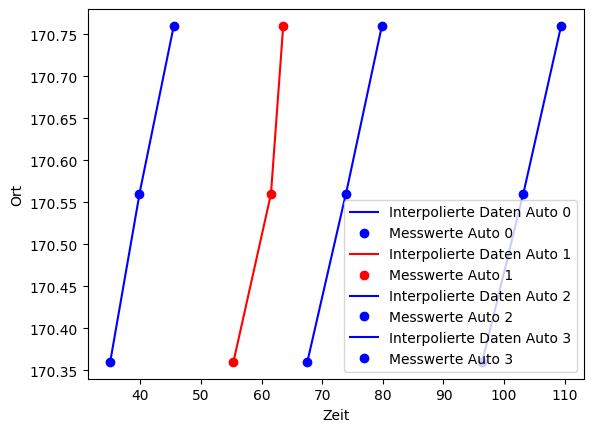

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	0.10776940890403486
1	|	4.040788971663389
2	|	0.02190401178898682
3	|	0.028658636188694242
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


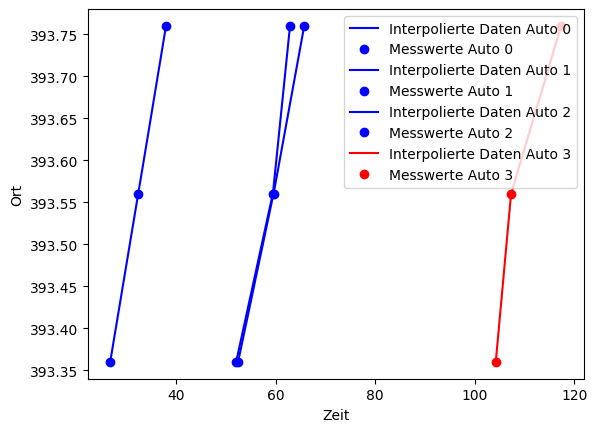

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	0.0005416594075269288
1	|	2.1291548801572246
2	|	0.08820163461392694
3	|	4.413413608758643
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
Error: Index 30 is out of range of the dataset with length 30 !!!
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


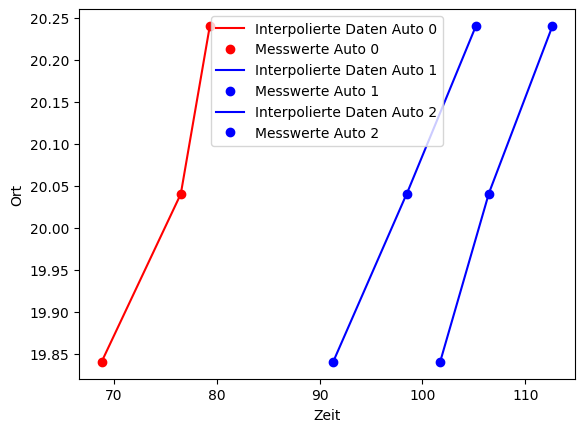

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	3.4042221007111295
1	|	0.015687179508772076
2	|	0.3090398922367066
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


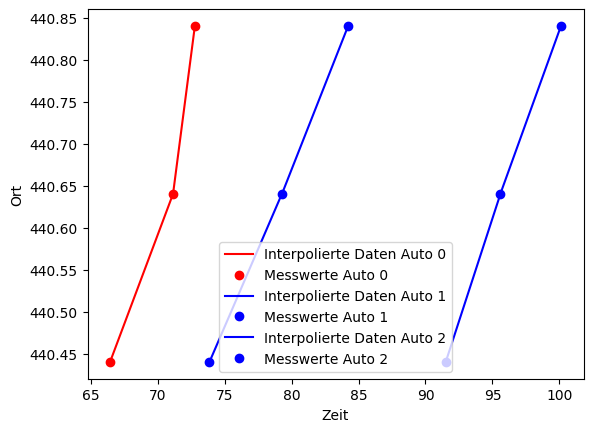

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	3.7038096919915775
1	|	0.03433916338443366
2	|	0.04601886092553409
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


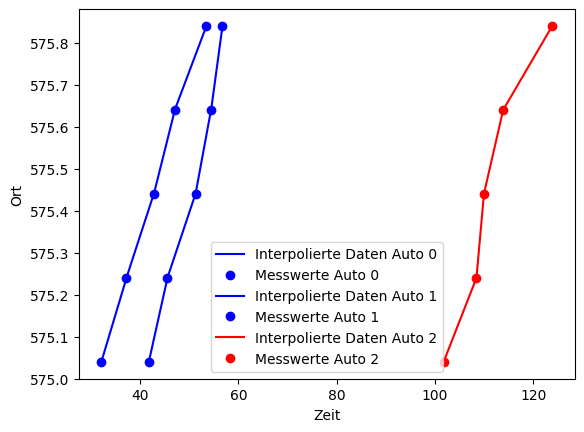

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	0.14925530178447888
1	|	1.1383049889423513
2	|	3.5750661896060687
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


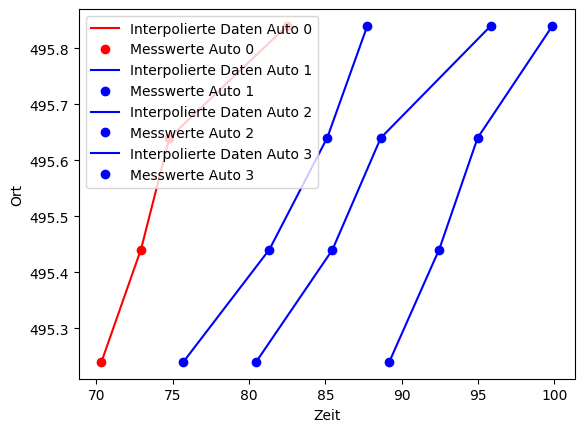

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	5.4394000480397775
1	|	1.3913458981841598
2	|	1.1874577417586463
3	|	0.9492121039944679
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
Error: Index 21 is out of range of the dataset with length 21 !!!
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


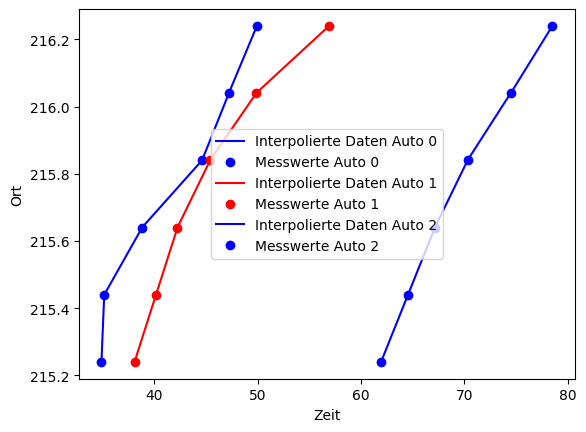

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	1.9775412862641506
1	|	3.168016326882528
2	|	0.5867231481209267
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


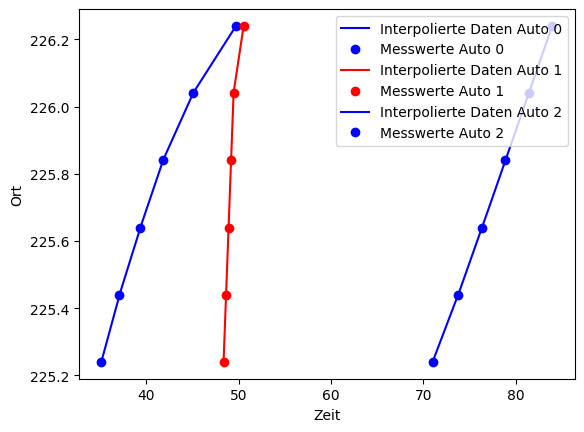

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	1.3615037704409305
1	|	5.703356029363393
2	|	0.01329595529506733
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


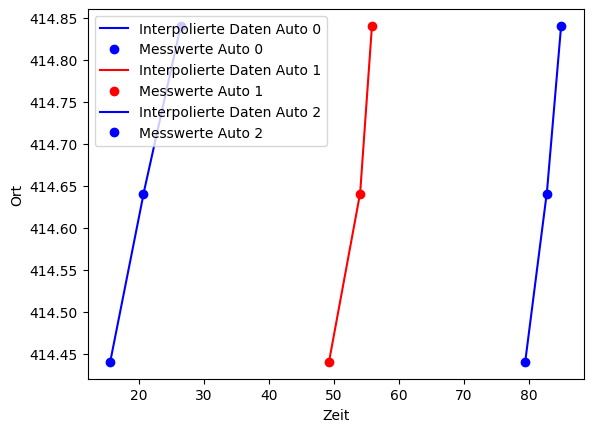

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	0.05535663317774997
1	|	3.1875160875048936
2	|	0.6709734756849772
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
Error: Index 22 is out of range of the dataset with length 22 !!!
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


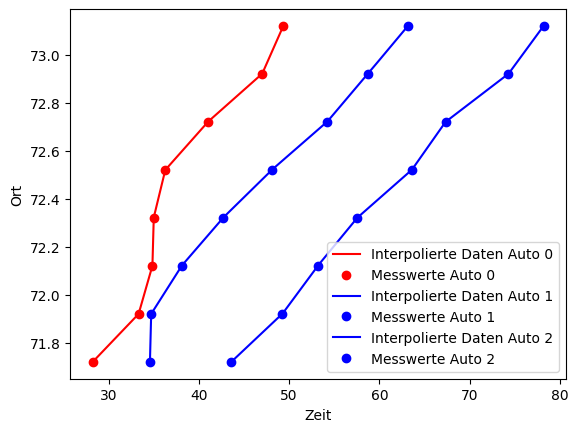

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	3.7863511903793556
1	|	1.3337128598879922
2	|	0.16877603925747886
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


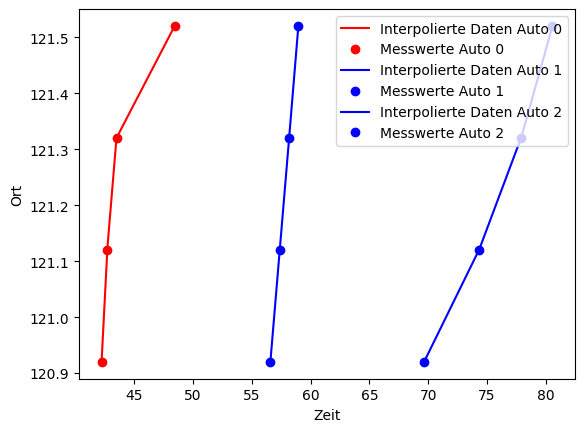

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	12.403846186636091
1	|	0.001192242513314845
2	|	0.7591750859663016
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


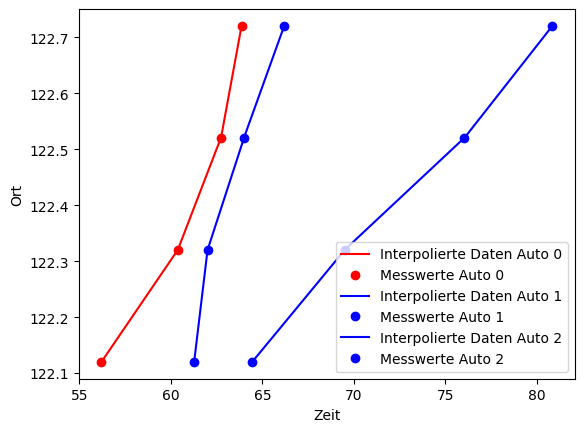

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	3.455017973740926
1	|	2.046861016893009
2	|	0.1728653135255498
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03
ACHTUNG mindestenz einmal eine größere Abweichung als 0.03


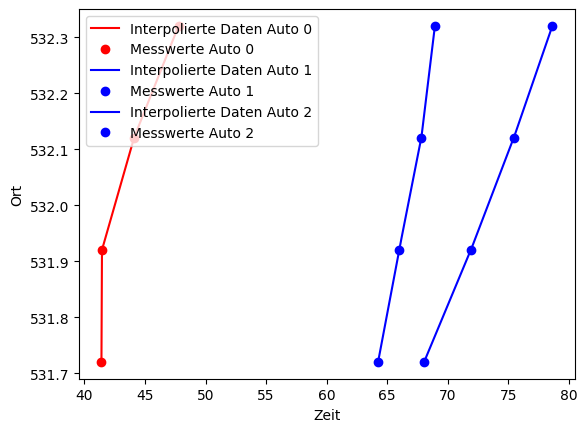

Der Fehler der Interpolation ist je
Auto	|	Realtiver Fehler
-------------------------------
0	|	6.552038846177699
1	|	0.5026982499940713
2	|	0.09162294689646355


In [3]:
from opt_lib import *
from matplotlib import pyplot as plt
filenames = [
	"TrafficDataset/sequence_data1-1_1.mat",
	"TrafficDataset/sequence_data1-1_2.mat",
	"TrafficDataset/sequence_data2-1_1.mat",
	"TrafficDataset/sequence_data2-1_2.mat",
	"TrafficDataset/sequence_data3-1_1.mat",
	"TrafficDataset/sequence_data3-1_2.mat",
	"TrafficDataset/sequence_data4-1_1.mat",
	"TrafficDataset/sequence_data4-1_2.mat",
	"TrafficDataset/sequence_data5-1_1.mat",
	"TrafficDataset/sequence_data5-1_2.mat"
	]

for ind in index:
	test = data_class(filenames[ind])
	test.test_correl() # correlation bestimmen
	mask_approx = np.zeros(test.get_len(), bool)

	for i in range(len(mask_approx)):
		mask_approx[i] = np.any(test.get_ItError() >= 0.03)
		test.next_dataset() # Nächster Datensatz
		test.test_correl()


	
	# Parameter definieren
	dt = 0.001
	L = 3
	v_max = 20

	test = data_class(filenames[ind])
	for j in np.where(mask_approx == True)[0][:]:
		test.next_dataset(j) # Nächster Datensatz
		test.test_correl()
		test.LinInterplation(dt) # mit dt schrittweite, denn Datensatz interpolieren

		# Visualisieren
		for i, cor in enumerate(test.get_ItError()):
			if cor >= 0.03:
				plt.plot(test.get_xIt()[i,:], test.get_tIt(), color = "red", label = f"Interpolierte Daten Auto {i}")
				plt.plot(test.get_x()[i,:], test.get_t(), "o", color = "red", label = f"Messwerte Auto {i}")
			else:
				plt.plot(test.get_xIt()[i,:], test.get_tIt(), color = "blue", label = f"Interpolierte Daten Auto {i}")
				plt.plot(test.get_x()[i,:], test.get_t(), "o", color = "blue", label = f"Messwerte Auto {i}")
		
  		# plt.plot(test.get_x()[0,:], test.get_t(), color = "blue")
		# plt.plot(test.get_x()[1,:], test.get_t(), color = "red")
		# plt.plot(test.get_x()[2,:], test.get_t(), color = "green", label = "Interpolierte Daten")
		# plt.plot(test.get_xIt()[0,:], test.get_tIt(), "o", color = "blue")
		# plt.plot(test.get_xIt()[1,:], test.get_tIt(), "o", color = "red")
		# plt.plot(test.get_xIt()[2,:], test.get_tIt(), "o", color = "green", label = "Messwerte")
		plt.legend()
		plt.xlabel("Zeit")
		plt.ylabel("Ort")
		plt.show()
		print(f"Der Fehler der Interpolation ist je")
		print("Auto\t|\tRealtiver Fehler")
		print("-------------------------------")
		for i, err in enumerate(test.get_ItError()):
			print(f"{i}\t|\t{err*100}")

# korrekte interpolation

In [1]:
from opt_lib import *
class data_class():
	__data = []
	__len = 0
	__x = np.ndarray
	__t = np.ndarray
	__counter = 0
	__unterCounter = 0
	__xIt = np.ndarray
	__tIt = np.ndarray
	__ItError = np.ndarray


	def get_len(self):
		return self.__len
	def get_x(self):
		return self.__x
	def get_t(self):
		return self.__t
	def get_tIt(self):
		return self.__tIt
	def get_xIt(self):
		return self.__xIt
	def get_ItError(self):
		return self.__ItError
	def set_x(self, x):
		self.__x = x
		return 
	def set_t(self, x):
		self.__t = x
		return
	def set_counter(self, x):
		self.__counter = x
		return
	def __init__(self, path):
		self.__data = loadmat(path)["sequences"][:]
		self.__len = len(self.__data)
		self.__counter = 0
		self.setXYTFromData(self.__counter)
		return
	def setXYTFromData(self, x):
		self.__x = np.array(self.__data[x][0].get("Xarr"))
		self.__t = np.array(self.__data[x][0].get("Tarr"))
		return 
	def next_dataset(self, dataset_num = None):
		if dataset_num == None:
			if self.__counter < self.__len - 1:
				self.__counter += 1
				self.setXYTFromData(self.__counter)
				return
			else:
				self.__counter += 1
				print(f"Error: Index {self.__counter} is out of range of the dataset with length {self.__len} !!!")
				return
		else:
			if dataset_num < self.__len - 1:
				self.__counter = dataset_num
				self.setXYTFromData(self.__counter)
				return
			else:
				self.__counter = dataset_num
				print(f"Error: Index {self.__counter} is out of range of the dataset with length {self.__len} !!!")
				return

	def getCurrentCoords(self, i=None):
		if i == None:
			i = self.__unterCounter
		maxZeilen = self.__x.shape[0]
		maxSpalten = self.__x.shape[1]
		xVals = np.array([self.__x[j, i] for j in range(maxZeilen) if i < maxSpalten])
		tVal = self.__t[i] if i < maxSpalten else None

		if i == self.__unterCounter:
			self.__unterCounter += 1
		return xVals, tVal

	# def d(self, x:np.ndarray): # Abstandsfunktion
	# 	d = np.ones_like(x) * np.inf # anfangs distanz auf sehr groß setzen
	# 	order_mask = np.argsort(x) # nach i-ter achse sortieren, hier x achse -> 0
	# 	x_ordered = x[order_mask]
	# 	for i, x_i in enumerate(x_ordered):
	# 		for j, x_j in enumerate(x_ordered[i+1:]): # nur Werte mit größerem Index (i+1) sind für den vergleich relevant, da nur diese vor dem Auto sind.
	# 			dist = np.linalg.norm(x_j - x_i)
	# 			d[i] = dist if d[i] > dist else d[i]
	# 	return d


	def switch_iteration(self):
		copy_x = self.__x.copy()
		copy_t = self.__t.copy()
		self.__x = self.__xIt 
		self.__t = self.__tIt 
		self.__xIt = copy_x
		self.__tIt = copy_t

	def test_correl(self, limit = 0.03):	
		corell = np.zeros(self.__x.shape[0])
		for i, auto in enumerate(self.__x):
			corell[i] = 1 - np.corrcoef(self.__t, auto)[0, 1]
		if np.sum(corell >= limit) >= 1:
			print(f"ACHTUNG mindestenz einmal eine größere Abweichung als {limit}")
		self.__ItError = corell
		return corell


	def test_interpolation(self, dt):
		rel_fehler = np.zeros(self.__x.shape[0])
		for i, auto in enumerate(self.__x):
			for x, t in zip(auto, self.__t):
				index = np.where((self.__tIt >= (t - dt/2)) & (self.__tIt <= (t + dt/2)))[0]
				if len(index) != 0:
					abs_fehler = np.abs(x-self.__xIt[i, index])
					rel_fehler[i] = rel_fehler[i] + abs_fehler/np.abs(x)
		avg_fehler = rel_fehler/len(self.__t)
		if np.sum(avg_fehler >= 0.05) > 1:
			print("ACHTUNG mindestenz einmal eine größere Abweichung als 5%")
		self.__ItError = avg_fehler
		return avg_fehler

	def LinApprox(self, dt=0.001):
		if np.sum(self.test_correl() >= 0.03) >= 1:
			print(f"ACHTUNG mindestenz einmal eine größere Abweichung als {0.03}")
		
		ort = self.__x
		zeit = self.__t
		zeit_int = np.arange(zeit[0], zeit[-1], dt)
		ort_int = np.zeros((ort.shape[0], len(zeit_int)))
		for i, auto in enumerate(ort):
			steigung = (np.max(auto)-np.min(auto))/(np.max(zeit)-np.min(zeit))
			ort_int[i,:] = steigung * np.arange(0, np.max(zeit)-np.min(zeit), dt) + np.min(auto)

		self.__xIt = ort_int
		self.__tIt = zeit_int
		# self.test_interpolation(dt)
		return ort_int, zeit_int


	def LinInterplation(self, dt=0.001):
		if np.sum(self.test_correl() >= 0.03) >= 1:
			print(f"ACHTUNG mindestenz einmal eine größere Abweichung als {0.03}")
		
		ort = self.__x
		zeit = self.__t
		zeit_int = np.arange(zeit[0], zeit[-1], dt)
		ort_int = np.zeros((3,*zeit_int.shape))
		for i, auto in enumerate(ort):
			ort_int[i, :] = np.interp(zeit_int, zeit, auto)
		self.__xIt = ort_int
		self.__tIt = zeit_int
		# self.test_interpolation(dt)
		return ort_int, zeit_int


In [16]:
ort_int = np.zeros((3,*zeit_int.shape))
ort_int.shape, *zeit_int.shape

((3, 61), 61)

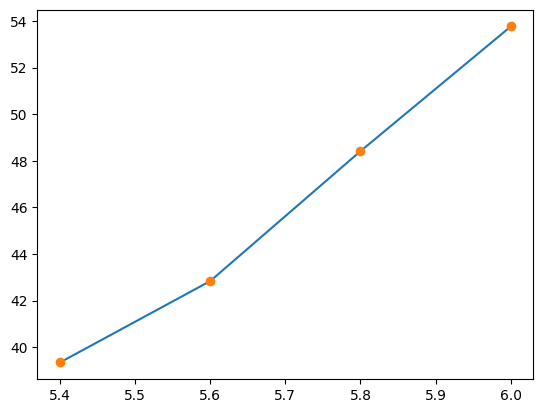

In [3]:
from matplotlib import pyplot as plt
test = data_class("TrafficDataset/sequence_data5-1_1.mat")
ort = test.get_x()
zeit = test.get_t()
dt = 0.01
zeit_int = np.arange(zeit[0], zeit[-1], dt)
ort_int = np.zeros((3,*zeit_int.shape))
for i, auto in enumerate(ort):
	ort_int[i, :] = np.interp(zeit_int, zeit, auto)
							#(		, DatasetZeit, PositionDataset			)
plt.plot(zeit_int, ort_int[0])
plt.plot(zeit, ort[0], "o")

In [ ]:
# Korrekte Interpolation	
 	def LinInterplation(self, dt=0.001):
		if np.sum(self.test_correl() >= 0.03) >= 1:
			print(f"ACHTUNG mindestenz einmal eine größere Abweichung als {0.03}")
		
		ort = self.__x
		zeit = self.__t
		zeit_int = np.arange(zeit[0], zeit[-1], dt)
		ort_int = np.zeros((3,*zeit_int.shape))
		for i, auto in enumerate(ort):
			ort_int[i, :] = np.interp(zeit_int, zeit, auto)
		self.__xIt = ort_int
		self.__tIt = zeit_int
		# self.test_interpolation(dt)
		return ort_int, zeit_int